In [38]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans


%matplotlib inline

### Read the titles

In [2]:
titles = open('./data/clean_data/titles').read().split('\n')
titles = titles[:24]

print (titles)

['DICTIONARY GREEK AND ROMAN GEOGRAPHY', 'WORKS OF CORNELIUS TACITUS WITH AN ESSAY ON HIS LIFE AND GENIUS', 'THE HISTORY OF THE PELOPONNESIAN WAR', 'THE HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE', 'THE HISTORY OF ROME', 'THE WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS', 'THE HISTORY OP TUK DECLINE AND FALL OFTHE ROMAN EMPIRE EDWARD GIBBON', 'THE DESCRIPTION OF GREECE BY PAUS ANIAS', 'THE HISTORY OF ROME THEODOR MOMMSEN', 'HISTORY OF ROME Book VIII 1 TRANSLATED  GEORGE BAKER', 'THE HISTORY OF THE PELOPONNESIAN WAR BY THUCYDIDES. VOL. I', "GIBBON'S HISTORY OF THE DECLINE AND FALL THE ROMAN EMPIRE FOR THE USE OF iFamilteg ant poung person", "GIBBON'S HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE FOR THE USE OF families anti foung J0er0on0", 'THE HISTORICAL ANNALS or COBWBXiXUS TACITUS: WITH SUPPLEMENTS, BY ARTHUR MURPHY, ESQ', "TITUS LIVIUS' ROMAN TRANSLATED INTO ENGLISH, AND ILLUSTRATED WITH NOTES, CRITICAL, HISTORICAL AND GEOGRAPHICAL, FOR THE USE OF STUDENTS IN HUMANITY BY 

In [3]:
titles_small = open('./data/clean_data/titles_small').read().split('\n')
titles_small = titles_small[:24]

print (titles_small)

['DICTIONARY GREEK AND ROMAN GEOGRAPHY', 'WORKS OF CORNELIUS TACITUS', 'HISTORY PELOPONNESIAN WAR', 'HISTORY DECLINE AND FALL OF ROMAN EMPIRE', 'HISTORY OF ROME', 'WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS', 'HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE', 'THE DESCRIPTION OF GREECE BY PAUS ANIAS', 'HISTORY OF ROME THEODOR MOMMSEN', 'HISTORY OF ROME Book VIII', 'HISTORY OF PELOPONNESIAN WAR', "GIBBON'S HISTORY DECLINE AND FALL ROMAN EMPIRE", "GIBBON'S HISTORY DECLINE AND FALL ROMAN EMPIRE", 'HISTORICAL ANNALS OF COBWBXiXUS TACITUS', "TITUS LIVIUS' ROMAN TRANSLATED INTO ENGLISH", 'THE WORKS Of JOSEPH US', 'THE WORKS OF CORNELIUS TACITUS', 'HISTORY OF ROME Book XXVII', 'THE FLAVIUS JOSEPHU CONTAINING TWENTY BOOKS', "PLINY'S NATURAL HISTORY", 'HISTORY OF THE ROMAN EMPIRE', 'HISTORIES CAIUS COBNELIUS TACITUS', 'HISTORY DECLINE AND FALL ROMAN EMPIRE', 'WORKS or FLAVIUS JOSEPHUS']


### Read the texts

In [4]:
file_range = list(range(24))

all_texts = []

for file_index in file_range:
    file_path = './data/clean_data/' + str(file_index) + '.txt'
    text = open(file=file_path).read()
    all_texts.append(text)
    
print (len(all_texts))

24


** `all_texts` contains set of 24 texts extracted from the files**

- need more preprocessing

### Tokenize and stem the texts

- exp with more type sof stemmers

#### Changes made from baseline:

- if re.search('[a-zA-z]', token) and len(token)>1

In [5]:
# load nltk's SnowballStemmer as variabled 'stemmer'

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

In [6]:
sample_text = """
 creslorecl  arant    cartwright foundation princeton university library      rs works  cornelius tacitus    essay   life  genius r notes supplements c tv bt arthur murphy esq praecipuum munus annalium reor ne virtutes sileantur utque pravii dicti factiaque ex poeteritate et infamil menu lit tacitus annates iii  j new edition   author last corrections  eight volumes vol v  printed  john stockdale piccadillt   v r tat ton  co printers shoe lane  history  tacitus book  vol v six   contents book   preface   history u summary view   whole work state   city  armies   provinces vi galba court   reigning vices vllf condition  spain gaul  upper  lower germany syria jegypt  africa  uar   jews conducted  vespasian xii  volt   legions  upper germany galba consults   choice  successor different opinions among  ministers vinius laco  icelus one   freedmen otho  hopes   nomination xiv choice  pnofor  succession xv galba speech upon  occasion  declares  adoption  piso   camp    senttle illtimed severity  galba  embassy   german legions xxi otho plans revolution  corrupts  preetorian guards two common soldiers undertake  dispose   sovereignty otho proclaimed emperor xxix galba   mean time employed  sacrifice   capital piso speech   soldiers xxxvii otho harangues  praetorians   camp xl  praetorians rush   city galba murdered xlii death  titus vinius  constancy  centurion piso put  death otho received ith adulation   senate   people xlvi  things directed  ike soldiers numbers executed manus celsus saved   artifice  otho xlviii characters  piso  titus vinius xlix cka contents book  racier  galba l vkellius  galba  aims   sovereignty li origin   revolt among  german legions vitellius saluted emperor  sends two armies  invade italy one  fabius valens     ccecina vitellius folloius  third army  excessive luxury  stupi dity  cruelty  rapine  valens  ccecina lxlii  gauls partly  fear  parti  inclination swear fidelity  vitellius lxiv valens   march hears   death  galba lxvii ccecina attacks  helvetians  lays waste  country  passes   penine mountains  italy lxxi otho conduct  rome  begins  act  vigour lxxh death  tigellinus   character lxxiv letters  otho  vitellius  endeavour  overreach   emissaries employed    people  sarmatia invade  province  mcesia   put   rout  great slaughter lxxx  insurrection   soldiers  rome lxxxiii otko speech   soldiers lxxxvi portents  prodigies spread general alarm  rome lxxxvi  otho consults   operations   war lie appoints lis gene rals  sends  fleet  invade  narbon gaul lxxxix melancholy condition   people  rome otho proceeds   expedition   viiellian forces  leaves  brother salvias titia nus chief governor  rome  transactions passed   months years    consuls   servius galla id time titus vinlus rjtfinus vj  u c   sh dfrnrti   umiis llii zs vx  f almfia jw     coek xcuii  history  tacitus book    aera      inten book tion  deduce  following narration   second consulship  servius galba  titus vinius   colleague  office   antecedent period inclu ding space  eight hundred  twenty years    foundation  rome  history   composed  various authors   jong       transactions b   roman people dignified  work  elo quence equal   subject  spirit  freedom worthy   old republic   battle  acfium   close   history book scene  civil distraction  power  authority  surrendered  single ruler  historic character disappeared  genius died    blow  ended public liberty truth  reduced   last gasp  various circumstances conspired   newconstitution took place undefined  little  stood men resigned  rights  lived like aliens   native country adulation began  spread  baneful  fluence  rooted hatred    bitious masters rankled   breast  numbers   parties one pay ing  court    brooding  public injuries  care  transmit ting due information  posterity  ut terly lost   true    seductions   timeserving writer  may  upon  guard     hand spleen  calumny  de voured  greedy ear flattery wears badge  servitude  malignity speaks  tone  independance   therefore well received  regard  writer   following work    truth aver  galba otho   tacitus  vitellius  neither known    marks  favour   personal injury  foundation   fortune c  laid  vespasian advanced  titus  carried higher  doraitian  fact must   dissembled   historian  enters   
"""

In [7]:
def tokenize_and_stem(text, tokenize_only = False):
    
    # split text into sentences
    
    list_of_sentences = nltk.sent_tokenize(text)
    
    # for each sentence split the sentence into tokens and add it to a list 
    
    tokens = []
    
    for sentence in list_of_sentences:
        tokens_for_sent = nltk.word_tokenize(sentence)
        for token in tokens_for_sent:
            tokens.append(token)
            
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-z]', token) and len(token)>1:
            filtered_tokens.append(token)
            
    if tokenize_only:
        return filtered_tokens
            
    stems = [stemmer.stem(t) for t in filtered_tokens]
            
    
    return stems

tokenize_and_stem(sample_text, tokenize_only=True)    

['creslorecl',
 'arant',
 'cartwright',
 'foundation',
 'princeton',
 'university',
 'library',
 'rs',
 'works',
 'cornelius',
 'tacitus',
 'essay',
 'life',
 'genius',
 'notes',
 'supplements',
 'tv',
 'bt',
 'arthur',
 'murphy',
 'esq',
 'praecipuum',
 'munus',
 'annalium',
 'reor',
 'ne',
 'virtutes',
 'sileantur',
 'utque',
 'pravii',
 'dicti',
 'factiaque',
 'ex',
 'poeteritate',
 'et',
 'infamil',
 'menu',
 'lit',
 'tacitus',
 'annates',
 'iii',
 'new',
 'edition',
 'author',
 'last',
 'corrections',
 'eight',
 'volumes',
 'vol',
 'printed',
 'john',
 'stockdale',
 'piccadillt',
 'tat',
 'ton',
 'co',
 'printers',
 'shoe',
 'lane',
 'history',
 'tacitus',
 'book',
 'vol',
 'six',
 'contents',
 'book',
 'preface',
 'history',
 'summary',
 'view',
 'whole',
 'work',
 'state',
 'city',
 'armies',
 'provinces',
 'vi',
 'galba',
 'court',
 'reigning',
 'vices',
 'vllf',
 'condition',
 'spain',
 'gaul',
 'upper',
 'lower',
 'germany',
 'syria',
 'jegypt',
 'africa',
 'uar',
 'jews',
 '

### TF IDF

- Initial setting: tutorial one

```
(max_df=0.8,  max_features=200000, 
min_df=0.2, stop_words='english',use_idf=True, 
tokenizer=tokenize_and_stem, ngram_range=(1,3)
```

- experimented with ngram_range

- try to remove stop_words param and observe: good results: better inertia with 4 clusters, but elbow still not forming

- apply GridSearchCV?
    


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8,  max_features=200000, 
                                    min_df=0.2,use_idf=True, stop_words='english',
                                    tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(all_texts)

print(tfidf_matrix.shape)


/home/shaunak/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 1min 37s, sys: 1.06 s, total: 1min 38s
Wall time: 1min 41s
(24, 34533)


The shape of TF IDF Matrix is (24, 34801)

In [9]:
terms = tfidf_vectorizer.get_feature_names()

print(len(terms))

34533


In [111]:
print(terms)

['aa', 'aaa', 'aad', 'aaron', 'ab senc', 'ab solut', 'ab stain', 'aba', 'aban', 'aban done', 'abandon citi', 'abandon countri', 'abandon enterpris', 'abandon flame', 'abandon post', 'abandon sieg', 'abandon without', 'abar', 'abat one', 'abb', 'abba', 'abbrevi', 'abdic', 'abet', 'abhor', 'abhorr', 'abi', 'abi liti', 'abid', 'abil success', 'abila', 'abili', 'abili tie', 'abject', 'abjur', 'abl bear', 'abl bear arm', 'abl carri', 'abl come', 'abl command', 'abl con', 'abl contain', 'abl defend', 'abl effect', 'abl even', 'abl fight', 'abl find', 'abl get', 'abl give', 'abl hold', 'abl judg', 'abl make', 'abl opportun', 'abl oppos', 'abl persuad', 'abl prevail', 'abl restrain', 'abl say', 'abl see', 'abl support', 'abl take', 'abl time', 'abl withstand', 'abler', 'ablest', 'abli', 'ablut', 'abo', 'abod', 'abolish', 'abolish right', 'abolit', 'abomin', 'aborigin', 'abort', 'abound', 'abovement', 'abra', 'abra ham', 'abraham', 'abridg', 'abroad home', 'abroad time', 'abrog', 'absalom', 'ab

### K Means

Trying k = 4:

In [112]:
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# each doc is assigned to a cluster: 0-4: so there are 100 entries(no of docs) in clusters

print(clusters)

print(len(clusters))

CPU times: user 10.7 s, sys: 316 ms, total: 11 s
Wall time: 6.06 s
[2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 0, 3, 3, 2, 2, 1, 2, 2, 1, 2, 3, 2, 3, 1]
24


In [113]:
docs = { 'title': titles, 'cluster': clusters}

frame = pd.DataFrame(docs, index = [clusters] , columns = ['title', 'cluster'])


frame

,title,cluster
2,DICTIONARY GREEK AND ROMAN GEOGRAPHY,2
2,WORKS OF CORNELIUS TACITUS WITH AN ESSAY ON HI...,2
0,THE HISTORY OF THE PELOPONNESIAN WAR,0
3,THE HISTORY OF THE DECLINE AND FALL OF THE ROM...,3
2,THE HISTORY OF ROME,2
1,THE WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS,1
3,THE HISTORY OP TUK DECLINE AND FALL OFTHE ROMA...,3
2,THE DESCRIPTION OF GREECE BY PAUS ANIAS,2
2,THE HISTORY OF ROME THEODOR MOMMSEN,2
2,HISTORY OF ROME Book VIII 1 TRANSLATED GEORGE...,2


### Tracking performance of K means


In [20]:
km.inertia_

13.693277063784143

In [21]:
km.cluster_centers_.shape

(4, 41939)

In [121]:
from sklearn.metrics import silhouette_score
sse = []
silhouette_scores = []
num_clusters_range = list(range(2, 20))

for num_clusters in num_clusters_range:
    print("Number of clusters:", num_clusters)

    km = KMeans(n_clusters=num_clusters)

    km.fit(tfidf_matrix)

    clusters = km.labels_.tolist()

    # each doc is assigned to a cluster: 0-4: so there are 100 entries(no of docs) in clusters

    # print(clusters)

    # print(len(clusters))
    
    sse.append(km.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_matrix, km.labels_))
    
    
    

Number of clusters: 2
Number of clusters: 3
Number of clusters: 4
Number of clusters: 5
Number of clusters: 6
Number of clusters: 7
Number of clusters: 8
Number of clusters: 9
Number of clusters: 10
Number of clusters: 11
Number of clusters: 12
Number of clusters: 13
Number of clusters: 14
Number of clusters: 15
Number of clusters: 16
Number of clusters: 17
Number of clusters: 18
Number of clusters: 19


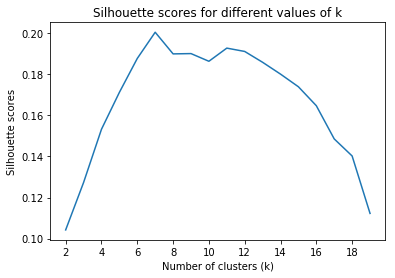

In [122]:
plt.plot(list(range(2,20)), silhouette_scores)
plt.xticks(list(range(2,20,2)))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette scores")
plt.title("Silhouette scores for different values of k");

Silhouette scores looks very good for 6 clusters

We apply K means using 6 clusters

In [43]:

num_clusters = 6

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# each doc is assigned to a cluster: 0-4: so there are 100 entries(no of docs) in clusters


CPU times: user 10.5 s, sys: 320 ms, total: 10.8 s
Wall time: 5.93 s


In [44]:
docs = { 'title': titles, 'cluster': clusters}

frame = pd.DataFrame(docs, index = [clusters] , columns = ['title', 'cluster'])


frame.sort_values(by='cluster')

,title,cluster
0,WORKS OF CORNELIUS TACITUS WITH AN ESSAY ON HI...,0
0,THE WORKS OF CORNELIUS TACITUS WITH AN ESSAY O...,0
0,THE HISTORICAL ANNALS or COBWBXiXUS TACITUS: W...,0
1,DICTIONARY GREEK AND ROMAN GEOGRAPHY,1
1,THE HISTORIES CAIUS COBNELIUS TACITUS: NOTES F...,1
1,THE FIRST AND THIRTY-THIRD BOOKS OF PLINY'S NA...,1
1,THE DESCRIPTION OF GREECE BY PAUS ANIAS,1
2,"THE HISTORY OF THE ROMAN EMPIRE EDWARD GIBBON,...",2
2,GIBBON'S HISTORY OF THE DECLINE AND FALL OF TH...,2
2,THE HISTORY DECLINE AND FALL ROMAN EMPIRE. BY ...,2


### Elbow Curve

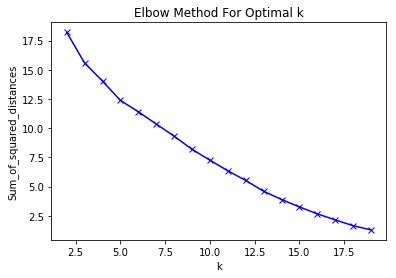

In [28]:
plt.plot(num_clusters_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Hierarchical Clustering

In [29]:
tfidf_matrix.shape

(24, 41939)

- experiment with diff dist
    - try euclidean

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

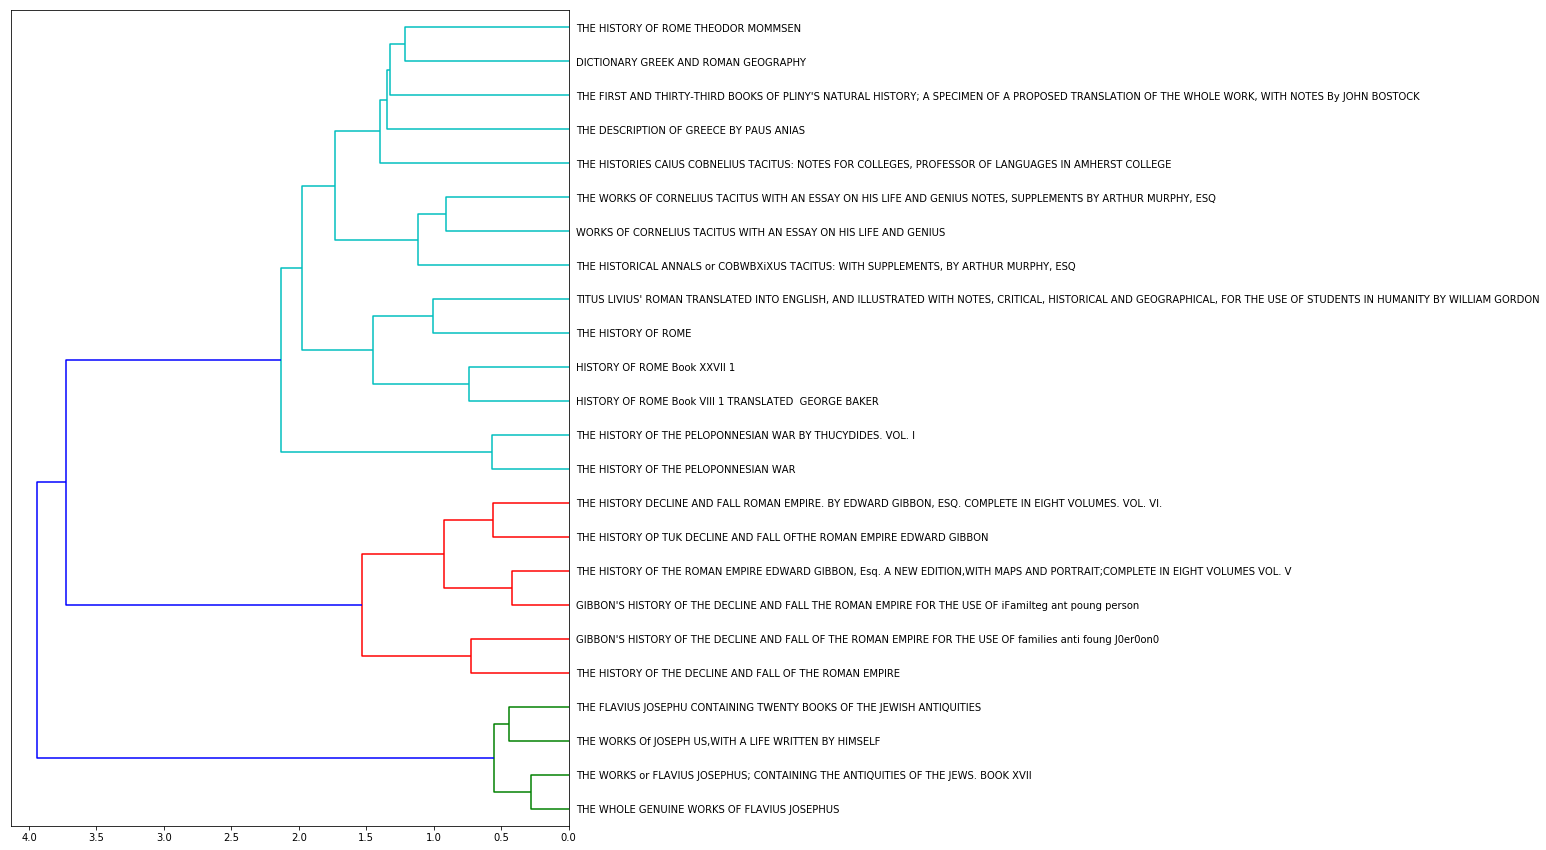

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

linkage_matrix = ward(dist)

labelList = titles
plt.figure(figsize=(10, 15))  


dendrogram(linkage_matrix,  
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
# plt.savefig('foo.png', bbox_inches='tight')

In [30]:
tfidf_matrix

<24x41939 sparse matrix of type '<class 'numpy.float64'>'
	with 315103 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity="cosine", linkage='complete')  
clusters_agg1 = cluster.fit_predict(tfidf_matrix.toarray())  

In [14]:
docs = { 'title': titles, 'cluster': clusters_agg1}

frame = pd.DataFrame(docs, index = [clusters_agg1] , columns = ['title', 'cluster'])


frame.sort_values(by='cluster')

,title,cluster
0,DICTIONARY GREEK AND ROMAN GEOGRAPHY,0
0,THE FIRST AND THIRTY-THIRD BOOKS OF PLINY'S NA...,0
0,THE HISTORY OF ROME THEODOR MOMMSEN,0
1,THE HISTORY OF THE PELOPONNESIAN WAR,1
1,THE DESCRIPTION OF GREECE BY PAUS ANIAS,1
1,THE HISTORY OF THE PELOPONNESIAN WAR BY THUCYD...,1
2,WORKS OF CORNELIUS TACITUS WITH AN ESSAY ON HI...,2
2,THE WORKS OF CORNELIUS TACITUS WITH AN ESSAY O...,2
2,THE HISTORICAL ANNALS or COBWBXiXUS TACITUS: W...,2
3,THE HISTORIES CAIUS COBNELIUS TACITUS: NOTES F...,3


In [66]:
cluster = AgglomerativeClustering(n_clusters=6, affinity="cosine", linkage='average')  
clusters_agg2 = cluster.fit_predict(tfidf_matrix.toarray())  

docs = { 'title': titles, 'cluster': clusters_agg2}

frame = pd.DataFrame(docs, index = [clusters_agg2] , columns = ['title', 'cluster'])


frame.sort_values(by='cluster')

,title,cluster
0,THE HISTORY OF THE PELOPONNESIAN WAR,0
0,THE DESCRIPTION OF GREECE BY PAUS ANIAS,0
0,THE HISTORY OF THE PELOPONNESIAN WAR BY THUCYD...,0
1,WORKS OF CORNELIUS TACITUS WITH AN ESSAY ON HI...,1
1,THE HISTORIES CAIUS COBNELIUS TACITUS: NOTES F...,1
1,THE WORKS OF CORNELIUS TACITUS WITH AN ESSAY O...,1
1,THE HISTORICAL ANNALS or COBWBXiXUS TACITUS: W...,1
2,DICTIONARY GREEK AND ROMAN GEOGRAPHY,2
2,THE HISTORY OF ROME THEODOR MOMMSEN,2
3,THE FLAVIUS JOSEPHU CONTAINING TWENTY BOOKS OF...,3


### MDS

In [26]:

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [130]:
pos.shape

(24, 2)

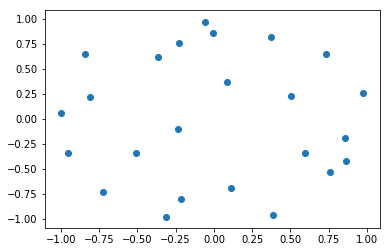

In [131]:
plt.scatter(xs,ys)

### Generate Visualization: Agg Clustering (n=7)

In [92]:
colors = ['#1687a7', '#dd0a35', '#a696c8', '#4bc2c5', '#20366b', '#f29c2b', '#7A57D1', '#990033']

def generate_cluster_viz(df, fig_name):
    #group by cluster
    groups = df.groupby('label')


    # set up plot
    fig, ax = plt.subplots(figsize=(20, 12)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, mec='none', color = colors[name])
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')

    #ax.legend(numpoints=1)  #show legend with only 1 point

    #add label in x,y position with the label as the film title
    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title_small'], size=9)  


    ax.axis('off')    
    plt.show() #show the plot

    #uncomment the below to save the plot if need be
    fig.savefig(fig_name, dpi=fig.dpi)
    


In [77]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_agg2, title=titles, title_small=titles_small)) 
df = df.sort_values(by='label')
df

,x,y,label,title,title_small
2,-0.043866,-0.729202,0,THE HISTORY OF THE PELOPONNESIAN WAR,HISTORY PELOPONNESIAN WAR
7,0.280929,-0.614770,0,THE DESCRIPTION OF GREECE BY PAUS ANIAS,THE DESCRIPTION OF GREECE BY PAUS ANIAS
10,0.019828,-0.627845,0,THE HISTORY OF THE PELOPONNESIAN WAR BY THUCYD...,HISTORY OF PELOPONNESIAN WAR
1,-0.383873,0.511911,1,WORKS OF CORNELIUS TACITUS WITH AN ESSAY ON HI...,WORKS OF CORNELIUS TACITUS
21,-0.254627,0.711220,1,THE HISTORIES CAIUS COBNELIUS TACITUS: NOTES F...,HISTORIES CAIUS COBNELIUS TACITUS
16,0.078584,0.133941,1,THE WORKS OF CORNELIUS TACITUS WITH AN ESSAY O...,THE WORKS OF CORNELIUS TACITUS
13,0.152358,-0.148719,1,THE HISTORICAL ANNALS or COBWBXiXUS TACITUS: W...,HISTORICAL ANNALS OF COBWBXiXUS TACITUS
0,-0.157012,-0.343626,2,DICTIONARY GREEK AND ROMAN GEOGRAPHY,DICTIONARY GREEK AND ROMAN GEOGRAPHY
8,-0.371551,-0.554713,2,THE HISTORY OF ROME THEODOR MOMMSEN,HISTORY OF ROME THEODOR MOMMSEN
18,0.318188,0.522166,3,THE FLAVIUS JOSEPHU CONTAINING TWENTY BOOKS OF...,THE FLAVIUS JOSEPHU CONTAINING TWENTY BOOKS


/home/shaunak/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/shaunak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


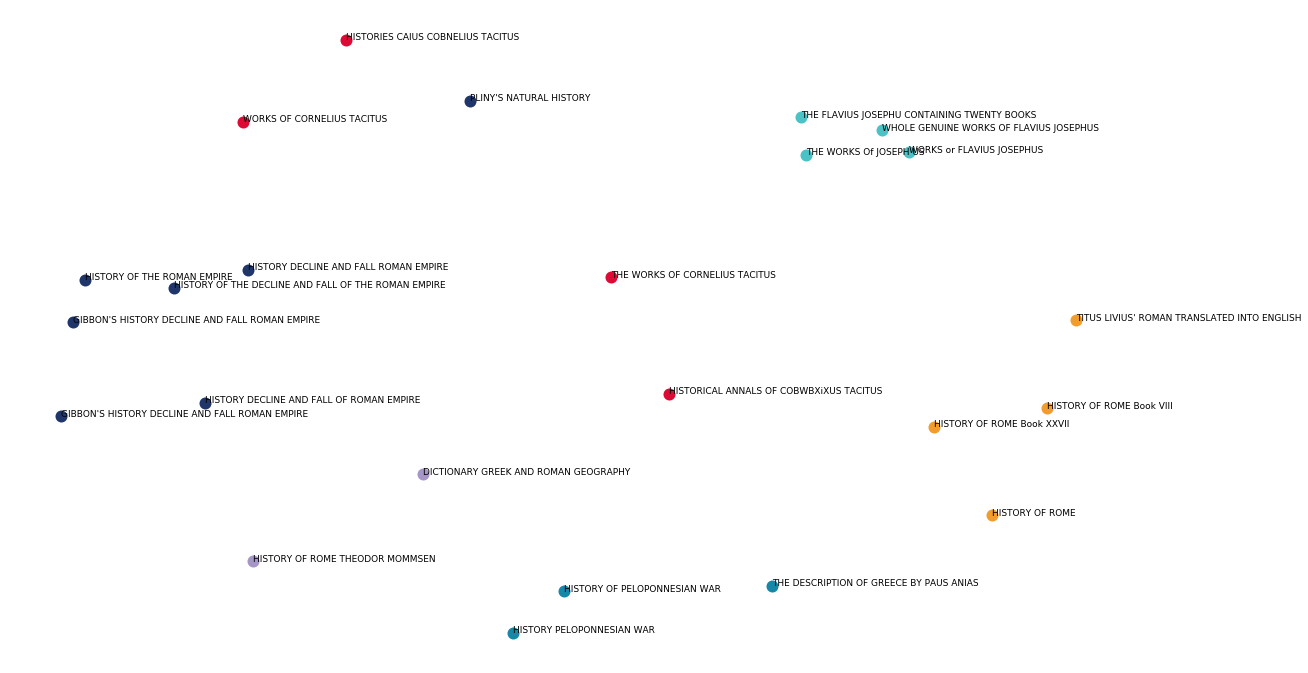

In [93]:
generate_cluster_viz(df, 'fig4.png')

### Generate Viz: K means (n = 6)

In [70]:
num_clusters = 6

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters_Kmeans = km.labels_.tolist()

# each doc is assigned to a cluster: 0-4: so there are 100 entries(no of docs) in clusters

CPU times: user 9.09 s, sys: 224 ms, total: 9.31 s
Wall time: 4.92 s


In [71]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_Kmeans, title=titles, title_small=titles_small)) 
df = df.sort_values(by='label')
df

,x,y,label,title,title_small
17,0.485361,-0.228732,0,HISTORY OF ROME Book XXVII 1,HISTORY OF ROME Book XXVII
4,0.558327,-0.443521,0,THE HISTORY OF ROME,HISTORY OF ROME
14,0.663571,0.030120,0,"TITUS LIVIUS' ROMAN TRANSLATED INTO ENGLISH, A...",TITUS LIVIUS' ROMAN TRANSLATED INTO ENGLISH
8,-0.371551,-0.554713,0,THE HISTORY OF ROME THEODOR MOMMSEN,HISTORY OF ROME THEODOR MOMMSEN
9,0.627500,-0.183279,0,HISTORY OF ROME Book VIII 1 TRANSLATED GEORGE...,HISTORY OF ROME Book VIII
23,0.453391,0.438422,1,THE WORKS or FLAVIUS JOSEPHUS; CONTAINING THE ...,WORKS or FLAVIUS JOSEPHUS
18,0.318188,0.522166,1,THE FLAVIUS JOSEPHU CONTAINING TWENTY BOOKS OF...,THE FLAVIUS JOSEPHU CONTAINING TWENTY BOOKS
15,0.323895,0.431951,1,"THE WORKS Of JOSEPH US,WITH A LIFE WRITTEN BY ...",THE WORKS Of JOSEPH US
5,0.419113,0.491617,1,THE WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS,WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS
12,-0.612174,-0.203917,2,GIBBON'S HISTORY OF THE DECLINE AND FALL OF TH...,GIBBON'S HISTORY DECLINE AND FALL ROMAN EMPIRE


/home/shaunak/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/shaunak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


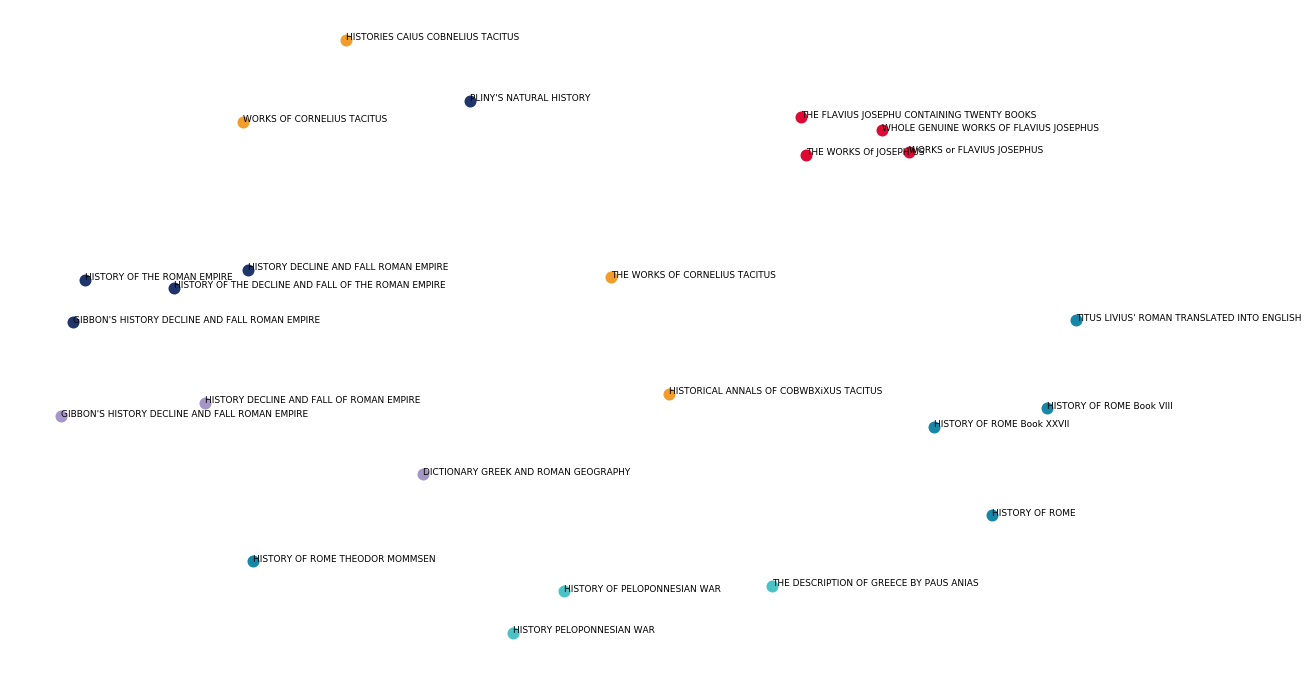

In [72]:
generate_cluster_viz(df, 'fig5.png')

- cornelius titus stuff works better here
- similar to agg clustering

### PCA

In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tfidf_matrix.toarray())

xs, ys = principalComponents[:, 0], principalComponents[:, 1]

In [147]:
#create data frame that has the result of the PCA plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_agg1, title=titles, title_small=titles_small)) 


/home/shaunak/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/shaunak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


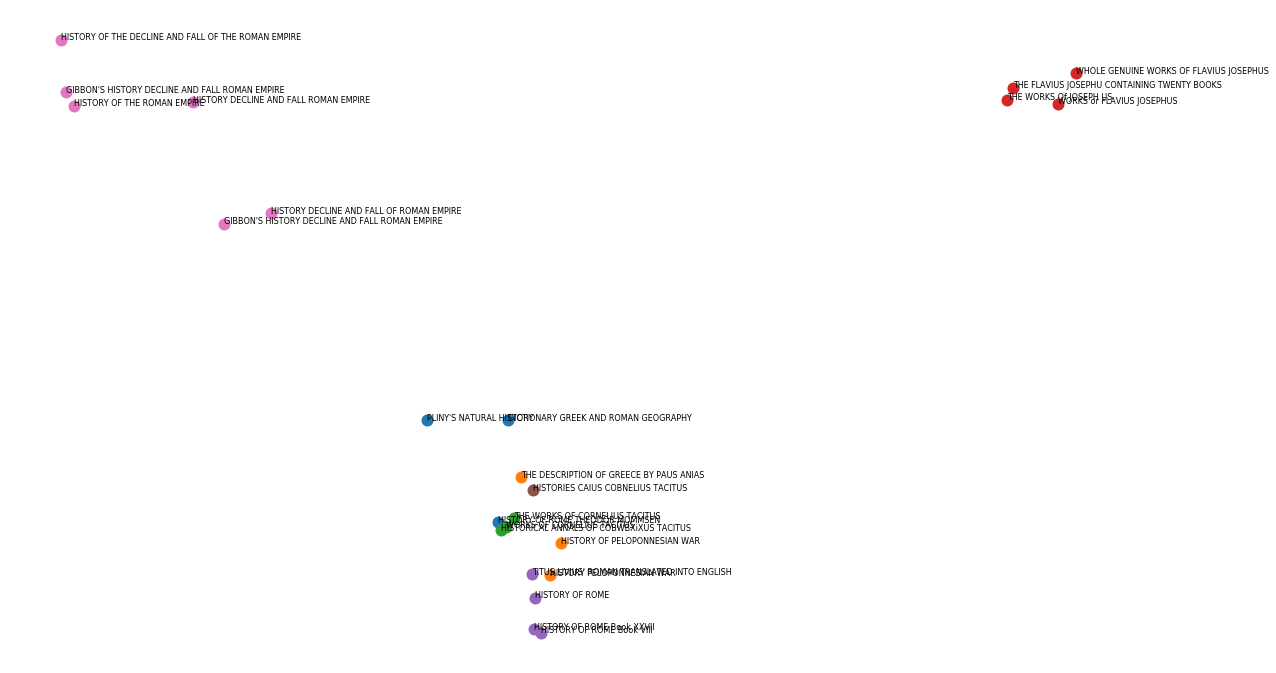

In [148]:
generate_cluster_viz(df)

/home/shaunak/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/shaunak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


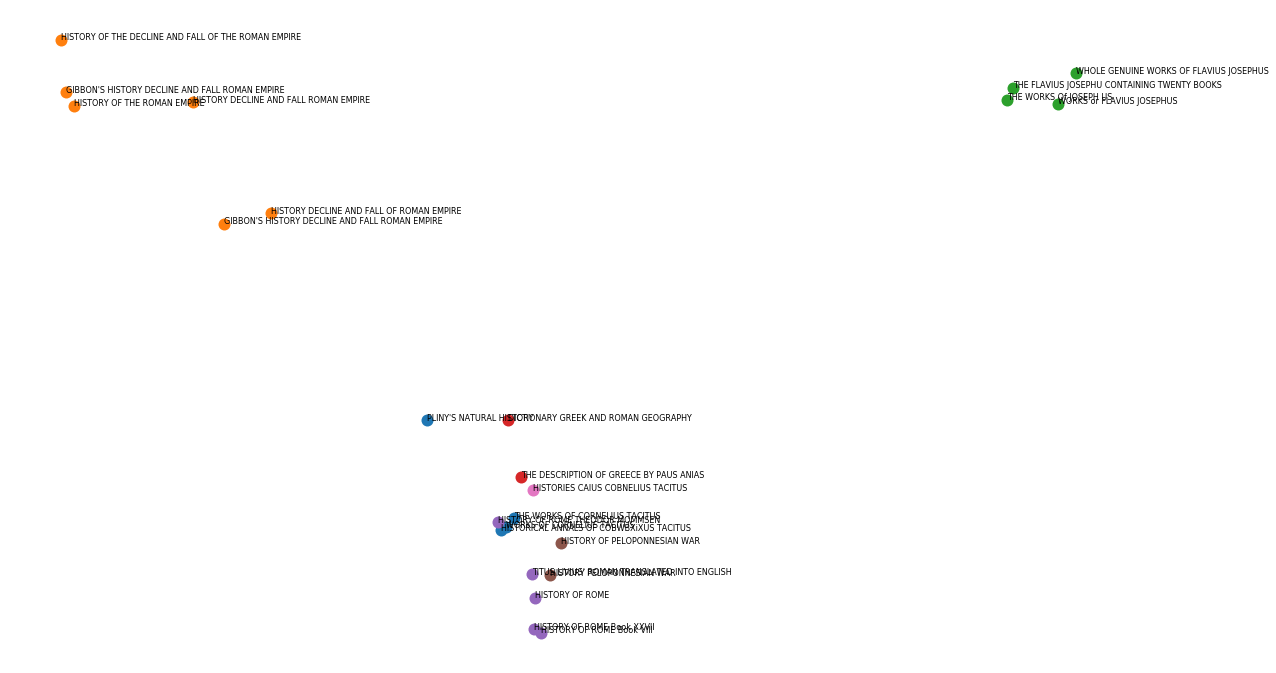

In [149]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_Kmeans, title=titles, title_small=titles_small)) 
generate_cluster_viz(df)

PCA: clusters appear closer together

### Try: tSNE

In [55]:
!pip install yellowbrick

    100% |████████████████████████████████| 286kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 5.4MB 3.1MB/s ta 0:00:01
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [59]:
tfidf_matrix.shape

(24, 34801)

In [56]:
from yellowbrick.text import TSNEVisualizer


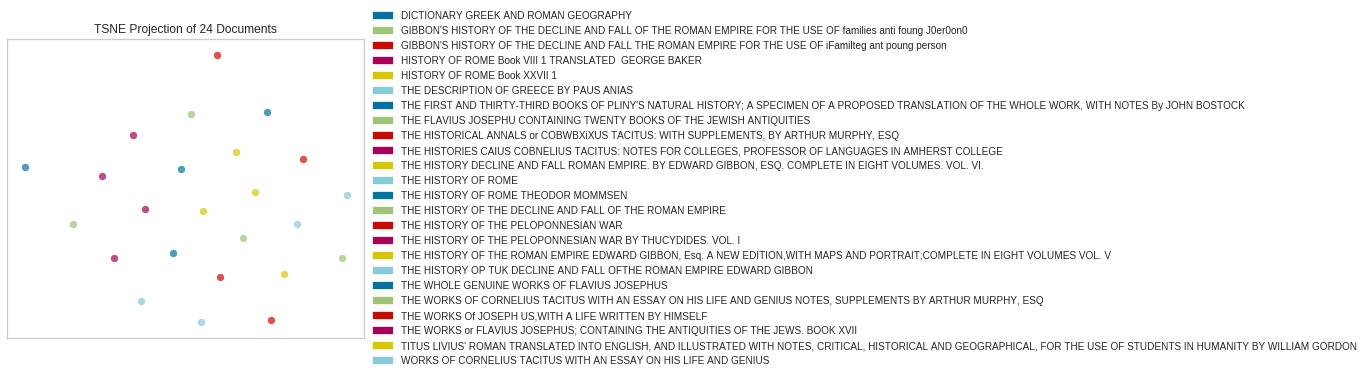

In [68]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix, titles)
tsne.poof()

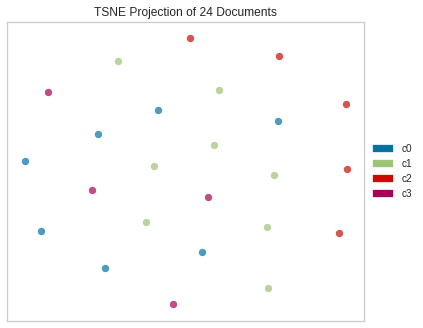

In [64]:
tsne = TSNEVisualizer()

tsne.fit(tfidf_matrix, ["c{}".format(c) for c in km.labels_])
tsne.poof()